<h1 style="text-align:center">Differences between Means in Groups of Data</h1>

<div style="text-align:center"><img src="https://datatab.net/assets/tutorial/anova/One_Factor_Analysis_of%20Variance_vs_t-Test.png"></div>

# ANOVA (Analysis of Variance)

- **Statistical Method** used to test the differences between means of 2 or more groups<br><br>
- It helps determine whether there are any significant differences between the means of 3 or more independent Groups<br><br>
- The ANOVA analysis is a statistical relevance tool designed to evaluate whether or not the null hypothesis can be rejected while testing hypotheses. It is used to determine whether or not the means of three or more groups are equal.



<br><br>

| **Source of Variation** | **Sum of Squares**                  | **Degree of Freedom (df)** | **Mean Squares**               | **F Value**                 |
|--------------------------|-------------------------------------|-----------------------------|---------------------------------|-----------------------------|
| **Between Groups**       | SSB = Σnj(X̄j – X̄)²               | df₁ = k – 1                | MSB = SSB / (k – 1)            | F = MSB / MSE or F = MST/MSE |
| **Error**                | SSE = Σnj(X̄ – X̄j)²               | df₂ = N – k                | MSE = SSE / (N – k)            |                             |
| **Total**                | SST = SSB + SSE                    | df₃ = N – 1                |                                 |                             |
<br><br>

- **F**: ANOVA Coefficient  <br><br>
- **MSB**: Mean of the total of squares between groupings  <br><br>
- **MSW**: Mean total of squares within groupings  <br><br>
- **MSE**: Mean sum of squares due to error  <br><br>
- **SST**: Total sum of squares  <br><br>
- **SSW**: Sum of squares within the groups  <br><br>
- **SSB**: Sum of squares between the groups  <br><br>
- **SSE**: Sum of squares due to error  <br><br>
- **p**: Total number of populations  <br><br>
- **n**: Total number of samples in a population  <br><br>
- **s**: Standard deviation of the samples  <br><br>
- **N**: Total number of observations  <br><br>


# Examples


- Assume it is necessary to assess whether consuming a specific type of tea will result in a mean weight decrease. Allow three groups to use three different varieties of tea: green tea, Earl Grey tea, and Jasmine tea. Thus, the ANOVA test (one way) will be utilized to examine if there was any mean weight decrease displayed by a certain group.<br><br>
- Assume a poll was undertaken to see if there is a relationship between salary and gender and stress levels during job interviews. A two-way ANOVA will be utilized to carry out such a test.


<div style="text-align:center"><img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/anova-table-1642579664.png"/></div>

<div style="text-align:center"><img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgpyDfEDK-lgpkASIgscEP6OBwu0aH-NviAgm-9DffeEBZHDDM6Uk9Vuo5IqOjjS2R_VK4LdEEq5xAwr5yVomnaoB9NOvB3THICPb-53k5CYolP7jovSJO1oFvTzpOHrj0FmVbKIMpz2Dg/s1600/ANOVA.png"/>

### One-Way ANOVA

- Only 1 dependent and 1 independent variable(with 3 or more groups). 
<br><br>
- If the **test statistic** exceeds the **critical value**, the **null hypothesis** is rejected, and the averages of at least two different groups are significant statistically.

<div style="text-align:center"><img src="https://media.geeksforgeeks.org/wp-content/uploads/20201111175412/custom.png"/></div>

### Two-Way ANOVA

- Each factor is examined independently to determine the main effect, as in a one-way ANOVA. <br><br>
- Furthermore, all components are analyzed at the same time to test the interaction impact.

<div style="text-align:center"><img src="https://decodingdatascience.com/wp-content/uploads/2023/03/Screenshot-2024-06-09-094042.png"/>

### Import Necessary Libraries


In [1]:
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets from Statsmodels Datasets Library regarding carData


In [2]:
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True)  # load data
# Printing all the values we have in the moore dataset
print(moore.keys())
print(moore.title)
data = moore.data
data = data.rename(columns={"partner.status": "partner_status"})  # make name pythonic

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])
Status, Authoritarianism, and Conformity


In [10]:
datapivot_table = data.pivot_table(
    index="partner_status", 
    columns="fcategory", 
    values="conformity", 
    aggfunc=np.mean  # Use mean in case of duplicates
)

In [11]:
datapivot_table

fcategory,high,low,medium
partner_status,,,
high,11.857143,17.4,14.272727
low,12.625000,8.9,7.250000


In [16]:
datapivot_table.loc['low'].mean()

9.591666666666667

In [17]:
data[data.partner_status=='low']['conformity'].mean()

9.954545454545455

<Figure size 1000x800 with 0 Axes>

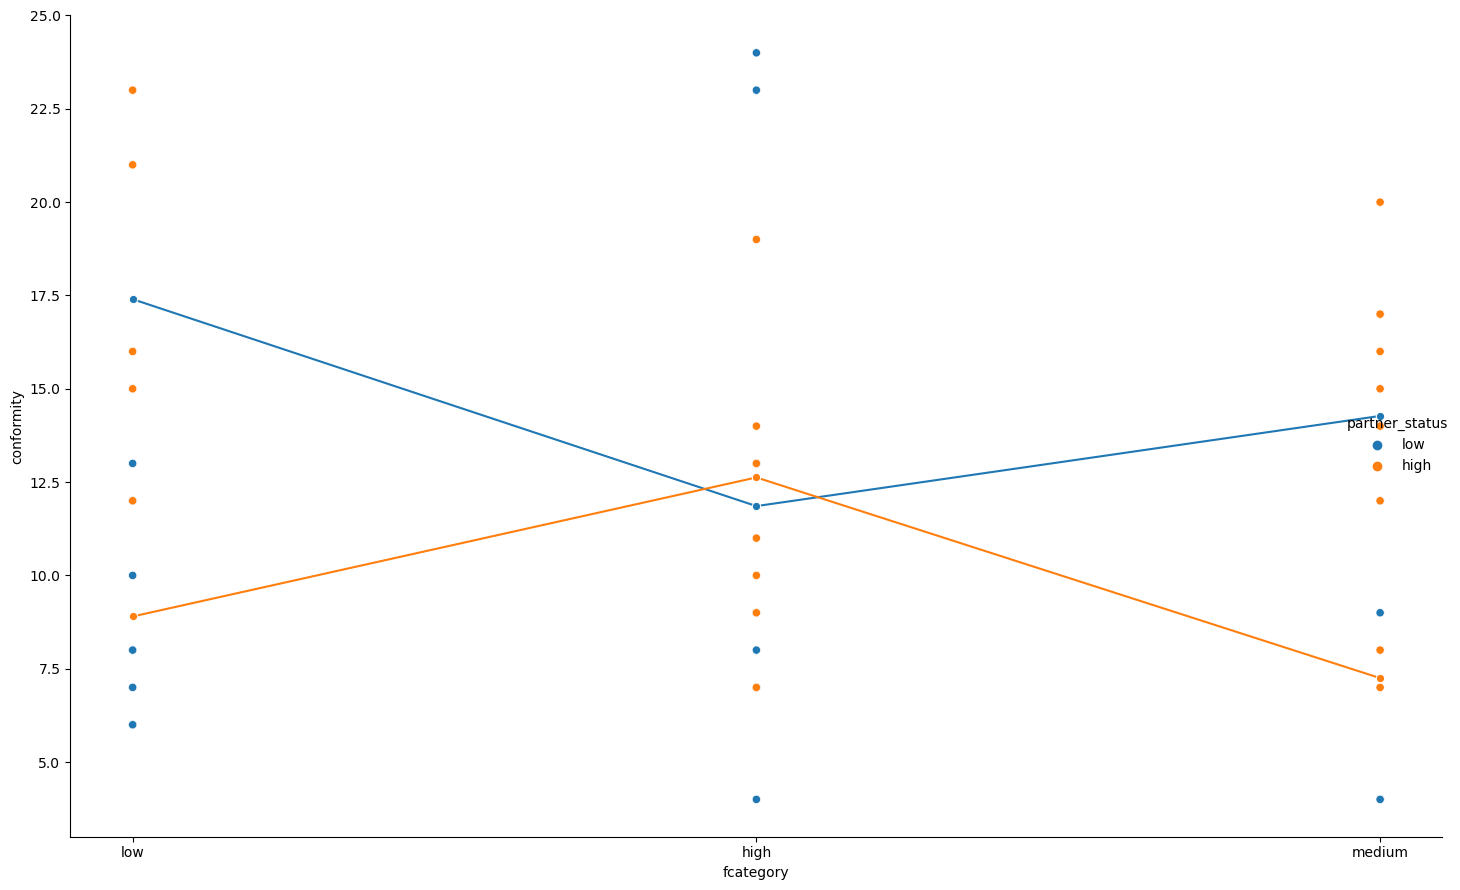

In [68]:
import warnings
warnings.filterwarnings("ignore")

# Create pairplot
plt.figure(figsize=(10, 8))
pairplot = sns.pairplot(
    data=data,
    hue="partner_status",
    x_vars=["fcategory"],
    y_vars=["conformity"],
    height=9,
    aspect=1.5,
)

# Calculate means
means = data.groupby(["partner_status", "fcategory"])["conformity"].mean().reset_index()

# Overlay means and lines
for ax in pairplot.axes.flat:
    sns.lineplot(
        data=means,
        x="fcategory",
        y="conformity",
        hue="partner_status",
        palette=sns.color_palette("tab10"),  # Match the pairplot colors
        ax=ax,
        marker="o",
        linestyle="-",  # Line style to connect means
        legend=False,  # Avoid duplicating legends
    )

# Adjust layout and display
plt.tight_layout()
plt.show()

<Axes: xlabel='fcategory', ylabel='conformity'>

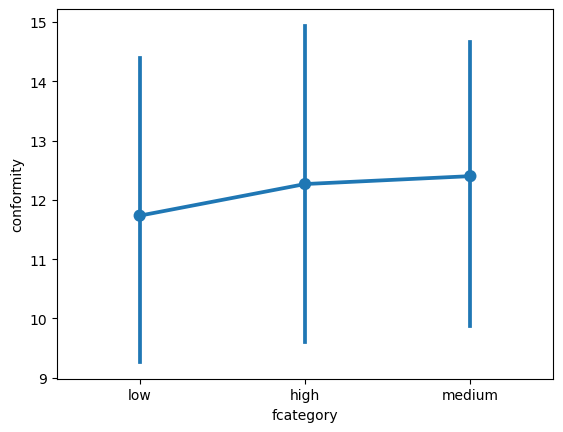

In [41]:
sns.pointplot(
    data=data,
    x="fcategory",
    y="conformity",
    # hue="partner_status",
    # markers=["o", "s"],
    # linestyles=["-", "--"]
)

In [42]:
data.groupby('fcategory')['conformity'].mean()

fcategory
high      12.266667
low       11.733333
medium    12.400000
Name: conformity, dtype: float64

<Axes: xlabel='partner_status,fcategory'>

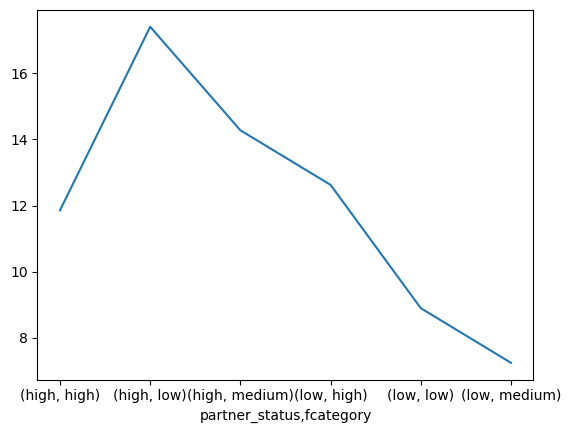

In [12]:
data.groupby(['partner_status','fcategory'])['conformity'].mean().plot()

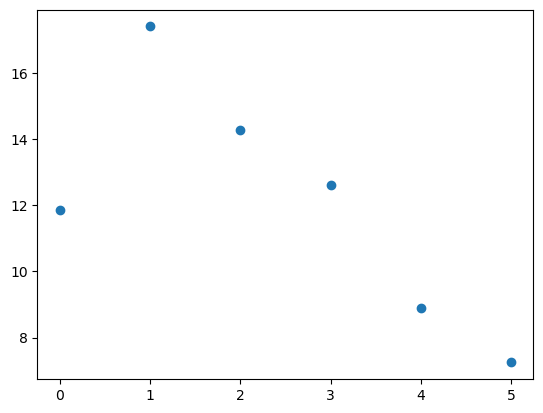

In [8]:
plt.scatter(data.groupby(['partner_status','fcategory'])['conformity'].mean().reset_index().index,data.groupby(['partner_status','fcategory'])['conformity'].mean().reset_index()['conformity'])

In [3]:
data.sample(10)

,partner_status,conformity,fcategory,fscore
39,high,7,medium,50
26,high,23,low,15
38,high,17,medium,41
43,high,10,high,52
36,high,14,high,52
4,low,10,low,36
23,high,12,medium,41
35,high,12,low,22
33,high,20,medium,44
15,low,24,high,57


In [4]:
print(data.groupby("partner_status")["conformity"].describe(), "\n")
print("-" * 75, "\n")
print(data.groupby("fcategory")["conformity"].describe())

                count       mean       std  min   25%   50%   75%   max
partner_status                                                         
high             23.0  14.217391  4.368862  7.0  11.5  14.0  17.0  23.0
low              22.0   9.954545  5.277782  4.0   7.0   8.5  12.0  24.0 

--------------------------------------------------------------------------- 

           count       mean       std  min  25%   50%   75%   max
fcategory                                                        
high        15.0  12.266667  5.812138  4.0  8.5  11.0  13.5  24.0
low         15.0  11.733333  5.243590  6.0  7.5  12.0  14.0  23.0
medium      15.0  12.400000  4.982828  4.0  8.5  14.0  16.5  20.0


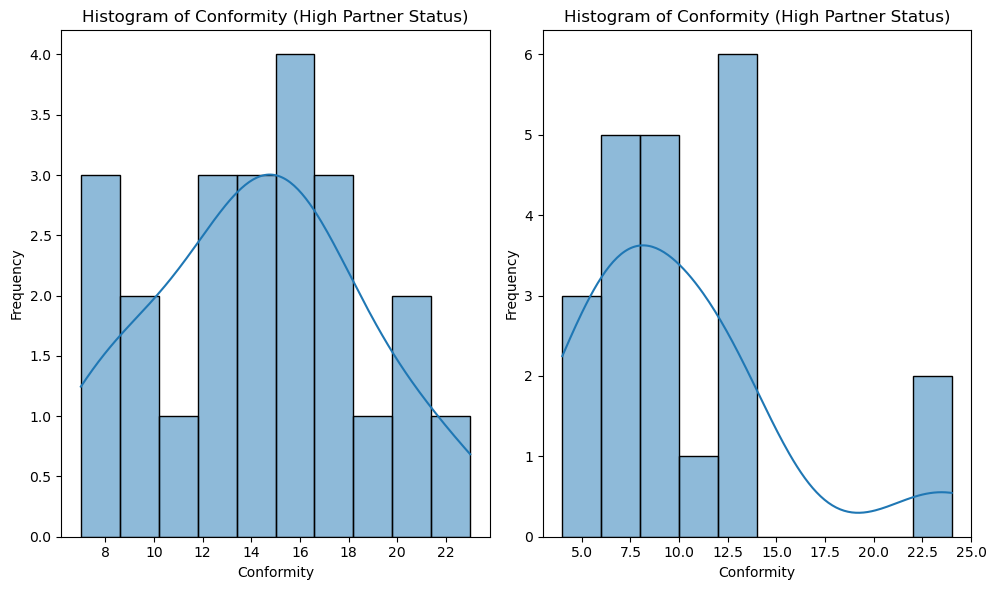

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a single subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 1 row, 1 column, single subplot

# Plot the histogram
sns.histplot(
    data=data[data["partner_status"] == "high"]["conformity"],
    bins=10,
    kde=True,
    ax=axes[0],
)

# Add labels and title for better clarity
axes[0].set_title("Histogram of Conformity (High Partner Status)")
axes[0].set_xlabel("Conformity")
axes[0].set_ylabel("Frequency")

# Plot the histogram
sns.histplot(
    data=data[data["partner_status"] == "low"]["conformity"],
    bins=10,
    kde=True,
    ax=axes[1],
)

# Add labels and title for better clarity
axes[1].set_title("Histogram of Conformity (High Partner Status)")
axes[1].set_xlabel("Conformity")
axes[1].set_ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()


<Axes: ylabel='Count'>

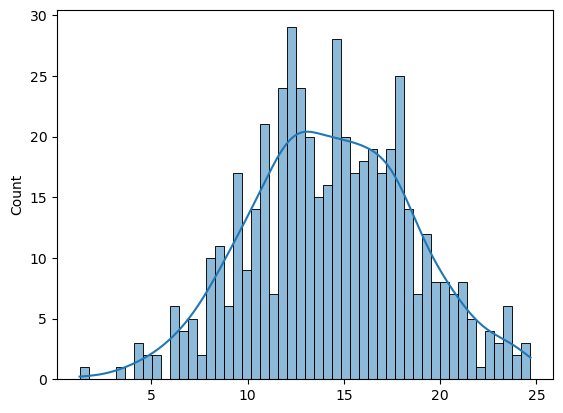

In [6]:
sns.histplot(np.random.normal(14.217, 4, 500), bins=50, kde=True)

### Let's Visualize the data


In [7]:
# From all data we can see random sample
np.random.seed(
    40
)  # Using seed value 40 so that we always get the same value of data while taking sample
data.sample(10)


,partner_status,conformity,fcategory,fscore
25,high,9,high,63
22,high,19,high,68
36,high,14,high,52
40,high,17,medium,39
4,low,10,low,36
44,high,15,medium,44
39,high,7,medium,50
16,low,6,low,28
11,low,13,high,56
28,high,17,medium,48


In [8]:
print("Shape of Data: ", data.shape)
print("-" * 50, "\n")
print("Data Info: ", data.info())
print("-" * 50, "\n")
print(
    "Descriptive Statistics of Numeric data: \n",
    data.describe(percentiles=[0.25, 0.5, 0.75, 0.9], include="number"),
)
print("-" * 50, "\n")
print(
    "Descriptive Statistics of Categorical data: \n",
    data.describe(percentiles=[0.25, 0.5, 0.75, 0.9], include="object"),
)

Shape of Data:  (45, 4)
-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   partner_status  45 non-null     object
 1   conformity      45 non-null     int64 
 2   fcategory       45 non-null     object
 3   fscore          45 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ KB
Data Info:  None
-------------------------------------------------- 

Descriptive Statistics of Numeric data: 
        conformity     fscore
count   45.000000  45.000000
mean    12.133333  43.111111
std      5.242310  14.249756
min      4.000000  15.000000
25%      8.000000  35.000000
50%     12.000000  43.000000
75%     15.000000  55.000000
90%     19.600000  60.200000
max     24.000000  68.000000
-------------------------------------------------- 

Descriptive Statistics of Categorical data: 
       

<Axes: xlabel='fscore', ylabel='Count'>

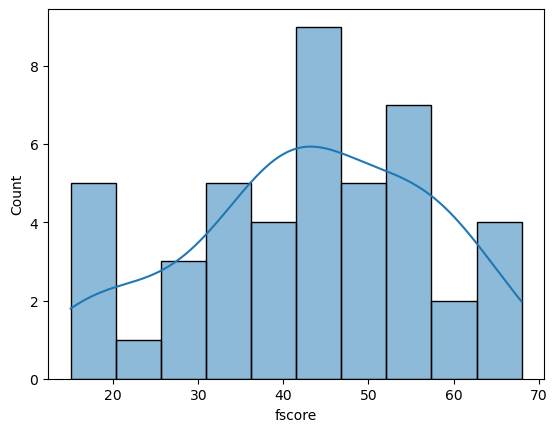

In [9]:
# Plotting the histogram for fscore values
sns.histplot(data["fscore"], kde=True, bins=10)

In [10]:
data["fcategory"].value_counts().reset_index()

,fcategory,count
0,low,15
1,high,15
2,medium,15


### Don't get confused with this code just look at the diagram underneath

It is just plotting a diagram for counts of different categories inside the factors or independent variables


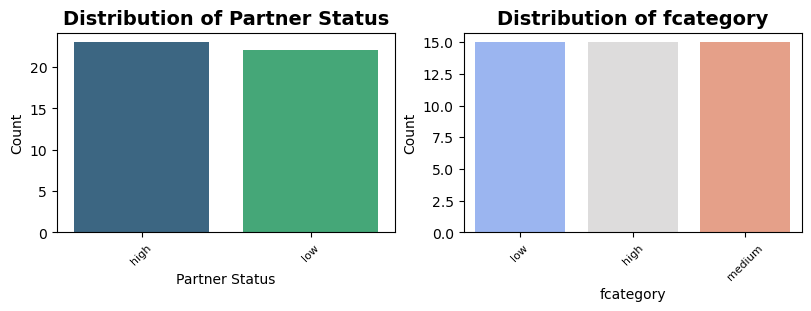

In [11]:
partner_status_data = data["partner_status"].value_counts().reset_index()
partner_status_data.columns = ["partner_status", "count"]

fcategory_data = data["fcategory"].value_counts().reset_index()
fcategory_data.columns = ["fcategory", "count"]

# Create a grid of plots
fig, axes = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

# Partner Status Bar Plot
sns.barplot(
    x="partner_status",
    y="count",
    data=partner_status_data,
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Distribution of Partner Status", fontsize=14, weight="bold")
axes[0].set_xlabel("Partner Status", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].tick_params(axis="x", rotation=45, labelsize=8)

# fcategory Bar Plot
sns.barplot(
    x="fcategory", y="count", data=fcategory_data, palette="coolwarm", ax=axes[1]
)
axes[1].set_title("Distribution of fcategory", fontsize=14, weight="bold")
axes[1].set_xlabel("fcategory", fontsize=10)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].tick_params(axis="x", rotation=45, labelsize=8)

# Show the plots
plt.show()


### Let's perform one way Anova

statsmodels.formula.api module provides us with Ordinary Least Squares functionality


#### Firstly let's take Partner Status as a factor and conformity as a numeric dependent variable


In [12]:
moore_lm = ols("conformity ~ C(partner_status, Sum)", data=data).fit()
sm.stats.anova_lm(moore_lm, typ=1)  # Type 2 ANOVA DataFrame

,df,sum_sq,mean_sq,F,PR(>F)
"C(partner_status, Sum)",1.0,204.332411,204.332411,8.743733,0.005029
Residual,43.0,1004.867589,23.369014,NaN,NaN


In [14]:
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:             conformity   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     8.744
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00503
Time:                        21:28:34   Log-Likelihood:                -133.74
No. Observations:                  45   AIC:                             271.5
Df Residuals:                      43   BIC:                             275.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [16]:
from scipy.stats import f

print("P Value Corresponding to our F statistics: ", f"{1 - f.cdf(2.211215, 1, 8)}")

P Value Corresponding to our F statistics:  0.17532368682351818


### Doing the ANOVA Test from scratch

In [19]:
(
    np.square(
        data[data.partner_status == "low"]["conformity"]
        - data[data.partner_status == "low"]["conformity"].mean()
    ).sum()
    + np.square(
        data[data.partner_status == "high"]["conformity"]
        - data[data.partner_status == "high"]["conformity"].mean()
    ).sum()
)

1004.8675889328063

In [20]:
data.groupby("partner_status")["conformity"].mean()

partner_status
high    14.217391
low      9.954545
Name: conformity, dtype: float64

In [21]:
data["conformity"].mean()

12.133333333333333

In [22]:
data.partner_status.value_counts()["high"] * np.square(
    data[data["partner_status"] == "high"]["conformity"].mean()
    - data["conformity"].mean()
) + data.partner_status.value_counts()["low"] * np.square(
    data[data["partner_status"] == "low"]["conformity"].mean()
    - data["conformity"].mean()
)

204.33241106719365

In [25]:
# Method 1: Shapiro Wilk test:
from scipy import stats

w, pvalue = stats.shapiro(moore_lm.resid)
print(w, pvalue)

0.9363190531730652 0.01578555442392826


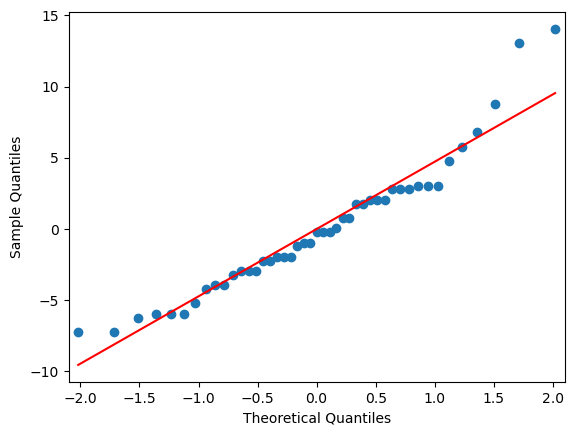

In [26]:
res = moore_lm.resid
fig = sm.qqplot(res, line="s")
plt.show()

In [27]:
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:             conformity   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     8.744
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00503
Time:                        10:38:23   Log-Likelihood:                -133.74
No. Observations:                  45   AIC:                             271.5
Df Residuals:                      43   BIC:                             275.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

- df denotes degree of freedom

- sum_sq denotes Sum of Squares

- mean_sq denotes Mean Squared Error which is sum_sq/df

- F denotes F-test SSbetween/SSwithin

- PR denotes p value


#### Similarly for 1 way ANOVA of fcategory and conformity


In [29]:
moore_lm = ols("conformity ~ C(fcategory, Sum)", data=data).fit()
sm.stats.anova_lm(moore_lm, typ=1)  # Type 2 ANOVA DataFrame

,df,sum_sq,mean_sq,F,PR(>F)
"C(fcategory, Sum)",2.0,3.733333,1.866667,0.065037,0.937127
Residual,42.0,1205.466667,28.701587,NaN,NaN


### 2 way Anova


In [29]:
model = ols("conformity ~ C(fcategory) * C(partner_status)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(fcategory),2.0,3.733333,1.866667,0.089023,0.915010
C(partner_status),1.0,212.213778,212.213778,10.120692,0.002874
C(fcategory):C(partner_status),2.0,175.488928,87.744464,4.184623,0.022572
Residual,39.0,817.763961,20.968307,NaN,NaN
